## Example Argo data tutorial

### Argo float data

In this tutorial, we will show how to use visualise data from Argo Float deployment(s) in VirtualShip.

## Set up

#### Imports

The first step is to import the Python packages required for post-processing the data and plotting. 

<div class="alert alert-block alert-success"> 
<b>Tip:</b> You may need to set the Kernel to the relevant (Conda) environment in the top right of this notebook to access the required packages! 
</div>

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import numpy as np
import cartopy.crs as ccrs
from mpl_toolkits.mplot3d import Axes3D

#### Data directory

Next, you should set `data_dir` to be the path to your expedition results in the code block below. You should replace `"/path/to/EXPEDITION/results/"` with the path for your machine.

<div class="alert alert-block alert-success"> 
<b>Tip:</b> You can get the path to your expedition results by navigating to the `results` folder in Terminal (using `cd`) and then using the `pwd` command. This will print your working directory which you can copy to the `data_dir` variable in this notebook. Don't forget to keep it as a string (in "quotation" marks)!
</div>

In [35]:
# data_dir = "/path/to/EXPEDITION/results/"  # set this to be where your expedition output data is located on your (virtual) machine

data_dir = "~/Documents/test_expeditions/argos/TEST/results/"  # set this to be where your expedition output data is located on your (virtual) machine

## Load data

We are now ready to read in the data using the `xarray` package.

In [38]:
# load argo data
argo_ds = xr.open_dataset(f"{data_dir}/argo_float.zarr")

argo_ds["trajectory"]

<xarray.DataArray 'trajectory' (trajectory: 2)> Size: 16B
array([0, 1])
Coordinates:
  * trajectory  (trajectory) int64 16B 0 1

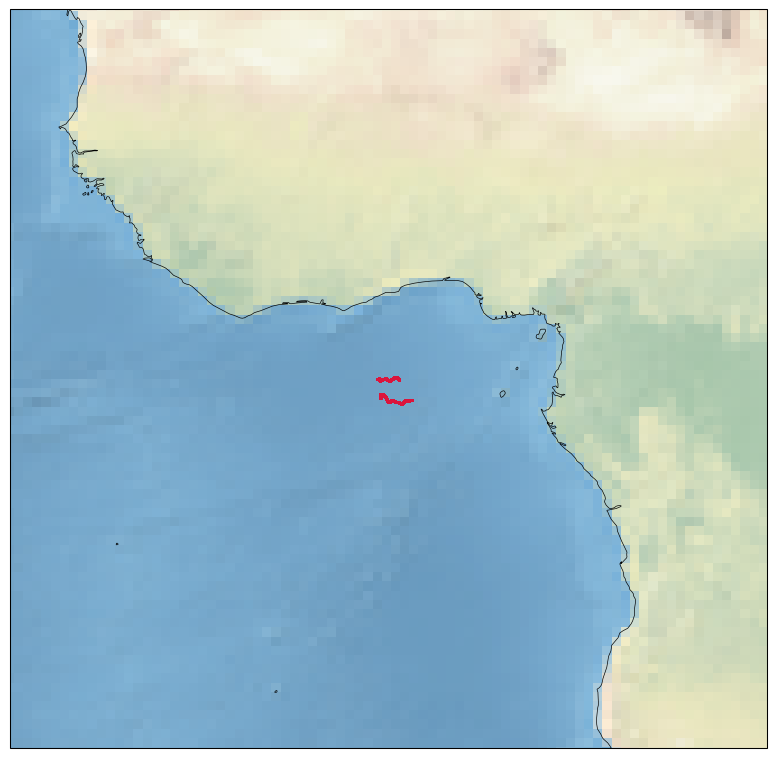

In [42]:
## Argo float trajectory plot

# set figure size based on aspect ratio of data
base_size = 10
aspect = float(argo_ds["lon"].max() - argo_ds["lon"].min()) / float(
    argo_ds["lat"].max() - argo_ds["lat"].min()
)
width = min(max(base_size * aspect, 4), 12)
height = min(max(base_size, 4), 12)

# fig
fig = plt.figure(figsize=(width, height), dpi=96)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

MARKERSIZE = 1

# plot trajectory
if len(argo_ds["trajectory"]) > 1:
    for i, traj in enumerate(argo_ds["trajectory"].values):
        # extract trajectory data
        lons = argo_ds["lon"][:].sel(trajectory=traj).squeeze()
        lats = argo_ds["lat"][:].sel(trajectory=traj).squeeze()
        depth = argo_ds["z"][:].sel(trajectory=traj).squeeze()

        ax.scatter(
            lons,
            lats,
            marker="o",
            s=MARKERSIZE,
            linestyle="-",
            linewidth=1,
            color="crimson",
            label=f"Argo Float {int(traj)}",
            transform=ccrs.PlateCarree(),
        )
else:
    lons = argo_ds["lon"][:].squeeze()
    lats = argo_ds["lat"][:].squeeze()
    depth = argo_ds["z"][:].squeeze()

    ax.scatter(
        lons,
        lats,
        marker="o",
        s=MARKERSIZE,
        linestyle="-",
        linewidth=1,
        color="crimson",
        label=f"Argo Float {int(argo_ds['trajectory'].values)}",
        transform=ccrs.PlateCarree(),
    )

# set extent with buffer
latlon_buffer = 20.0
ax.set_extent(
    [
        lons.min() - latlon_buffer,
        lons.max() + latlon_buffer,
        lats.min() - latlon_buffer,
        lats.max() + latlon_buffer,
    ],
    crs=ccrs.PlateCarree(),
)

# additional map features
ax.stock_img()
ax.coastlines(linewidth=0.5)

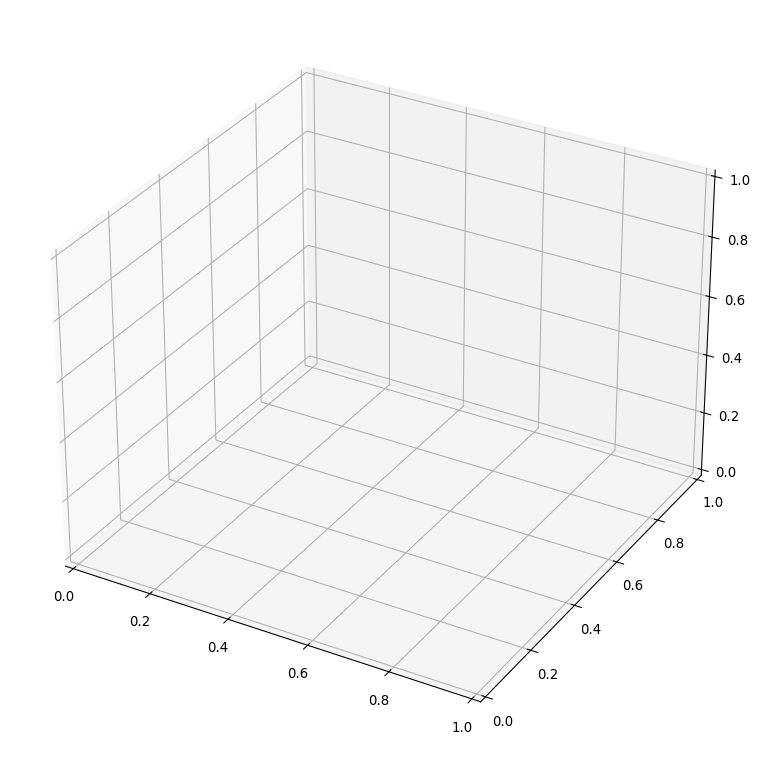

In [31]:
## 3D plot of trajectory and sampling temperature / salinity (user chooses)
fig = plt.figure(figsize=(10, 10), dpi=96)
ax = fig.add_subplot(1, 1, 1, projection="3d")

We can now plot the trajectory of the float using the code below (copied from the [Parcels Argo float tutorial](https://docs.oceanparcels.org/en/latest/examples/tutorial_Argofloats.html)):

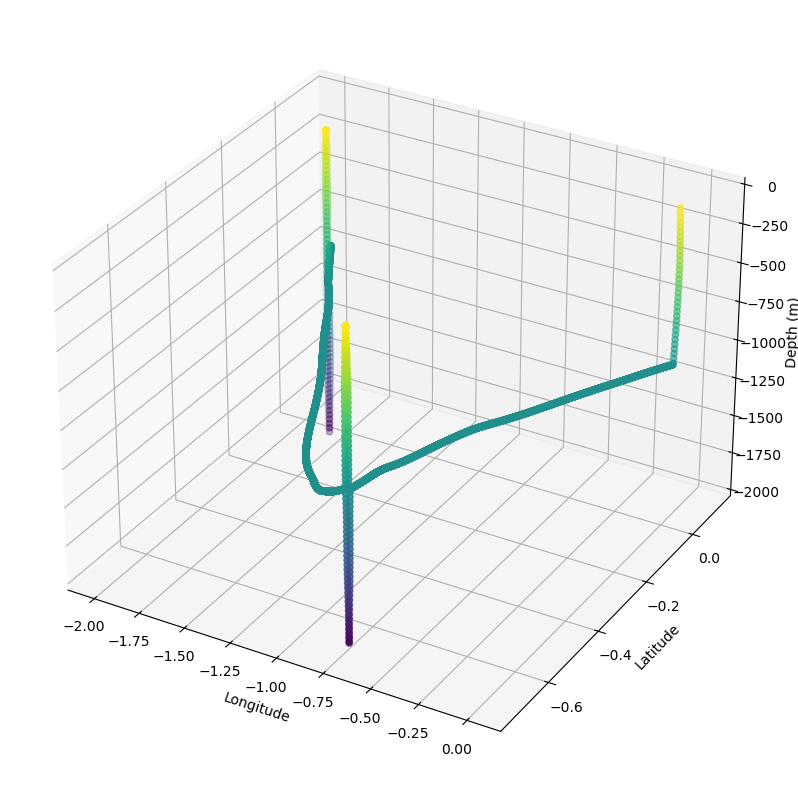

In [ ]:
x = ds["lon"][:].squeeze()
y = ds["lat"][:].squeeze()
z = ds["z"][:].squeeze()

fig = plt.figure(figsize=(13, 10))
ax = plt.axes(projection="3d")
cb = ax.scatter(x, y, z, c=z, s=20, marker="o")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Depth (m)")
ax.set_zlim(-2000, 0)
plt.show()